# Sentiment Analysis of Health Tweets -- Exploratory Data Analysis

## Introduction

After the data cleaning step, the next step is to explore the data before doing any deep leaning. Here I will check **Most Common Words** to see which health keywords people are talking most at this moment.


## Loading the data


In [1]:
#load python packages
import os
import pandas as pd
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
from datetime import datetime
from nltk.corpus import stopwords
import nltk
from collections import Counter
from wordcloud import WordCloud
%matplotlib inline

In [2]:
df = pd.read_csv('data/clean_data.csv',index_col=0)
df.head()

,user_name,date,text
0,104885,2020-11-03,anxiety x games mode 😳
1,23653,2020-11-03,officialmonstax oh im sorry make anxious
2,126001,2020-11-03,way dey see body app top deɛ asɛ mo nta mpo kai
3,57974,2020-11-03,ewjulii count ways funtime freddy whip nae nae...
4,27889,2020-11-03,mx7mention officialmonstax officialwonho love ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146046 entries, 0 to 146045
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_name  146046 non-null  int64 
 1   date       146046 non-null  object
 2   text       146043 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [4]:
df[df.text.isnull()]

,user_name,date,text
72556,97237,2020-11-06,NaN
125299,126605,2020-11-08,NaN
139715,95076,2020-11-09,NaN


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146043 entries, 0 to 146045
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_name  146043 non-null  int64 
 1   date       146043 non-null  object
 2   text       146043 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


### Create a big list of words out of all the tweets

Let's put all words in all tweets together to check the most commom words.

In [6]:
words_list = [word for line in df.text for word in line.split()]
words_list[:5]

['anxiety', 'x', 'games', 'mode', '😳']

### Create the WordCloud

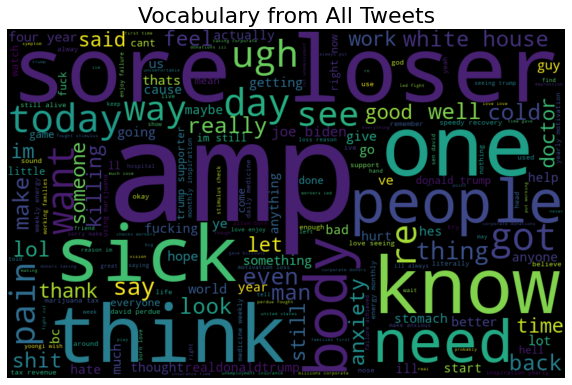

In [7]:
wc = WordCloud(width=800, height=500, random_state=42)
plt.figure(figsize=(10, 7))
wc.generate(' '.join(words_list))
plt.imshow(wc, interpolation="bilinear")
plt.title("Vocabulary from All Tweets", fontsize = 22)
plt.axis("off")
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-3 Health_Care\figures\wordcloud_all_tweets.png')

From the WordCloud figher above we can see that people talked about 'sore', 'sick', 'anxiety', 'pain' a lot. But there're some frequent words have very little meaning and could be added to a stop words list.

**Check the frequecy of each word**

In [8]:
word_counts = Counter(words_list).most_common()
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'frequency']
words_df = words_df.sort_values('frequency', ascending=False)
words_df.head(10)

,word,frequency
0,like,12755
1,people,11387
2,amp,10199
3,trump,9744
4,get,9473
5,i’m,9052
6,sick,8559
7,one,8046
8,im,8040
9,body,8018


**Check the tweets including Trump**

In [9]:
# The data was scraped during the election period, let's check how many tweets are about Trump
df_trump = df[df.text.str.contains('trump')]
print('The number of tweets about Trump: {}'.format(len(df_trump)))
print('The percentage of tweets about Trump: {}%'.format(round(len(df_trump) / len(df) * 100, 2)))

The number of tweets about Trump: 14606
The percentage of tweets about Trump: 10.0%


In [10]:
# Let's check how many tweets talk about election when they talk about Trump
df_trump_election = df_trump[df_trump.text.str.contains('election|vote|voting|debates|ivoted|electoral|voter|biden')]
print('The number of tweets about Trump with election: {}'.format(len(df_trump_election)))
print('The percentage of tweets about Trump with election: {}%'.format(round(len(df_trump_election) / len(df_trump) * 100, 2)))

The number of tweets about Trump with election: 5661
The percentage of tweets about Trump with election: 38.76%


In [11]:
# Let's drop those tweets talk about election since we only concern the health in this project
cond = df.index.isin(df_trump_election.index)
df.drop(df[cond].index, inplace = True)

In [12]:
df.shape

(140382, 3)

**Update the words_list**

In [13]:
# get a new words_list from data without election
words_list = [word for line in df.text for word in line.split()]
word_counts = Counter(words_list).most_common()
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'frequency']
words_df = words_df.sort_values('frequency', ascending=False)
words_df.head(50)

,word,frequency
0,like,12212
1,people,10832
2,amp,9610
3,get,9186
4,i’m,8920
5,sick,8190
6,im,7803
7,body,7798
8,one,7644
9,time,7128


In [14]:
# read the keywords from txt to a list
txt_list = []

with open('keywords.txt', "r") as f:
    txt_list = f.read().split()

keywords = [word.strip(',') for word in txt_list]

In [15]:
# get top most common words that the count > 5000 and not including sick
add_stopwords = [word for word, count in word_counts if count > 4000 if word not in keywords]
add_stopwords

['like',
 'people',
 'amp',
 'get',
 'i’m',
 'im',
 'one',
 'time',
 'us',
 'love',
 'know',
 'it’s',
 'trump',
 'need',
 'make',
 'go',
 'take',
 'new',
 'right',
 'going',
 'feel',
 'good',
 'want',
 'still',
 'even',
 'don’t',
 'day',
 'it',
 'much',
 'would',
 'think',
 'please']

In [16]:
from sklearn.feature_extraction import text 
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

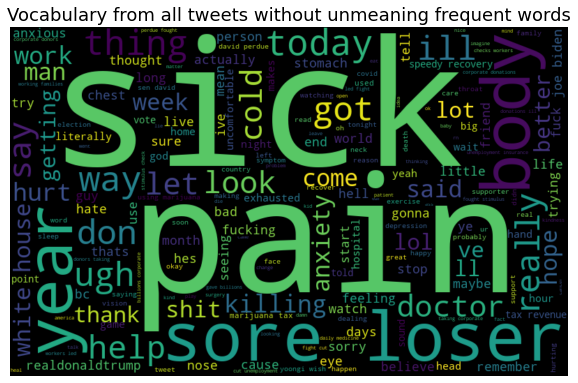

In [22]:
wc = WordCloud(stopwords=stop_words,width=800, height=500, random_state=42,max_font_size=250)
plt.figure(figsize=(10, 7))
wc.generate(' '.join(words_list))
plt.imshow(wc, interpolation="bilinear")
plt.title("Vocabulary from all tweets without unmeaning frequent words", fontsize = 18)
plt.axis("off")
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-3 Health_Care\figures\wordcloud_all_tweets_without_unmeaning.png')

After removing unmeaning words, we can see that our data looks more sence. And we can see that people is talking about  'sick', 'ill', 'body,'pain','anxiety', 'ill', 'hurts' more ofen.

### Let's check how often people talk about for each word

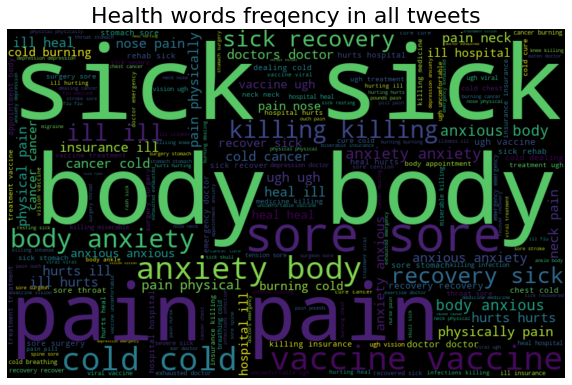

In [23]:
words_list_keywords = [word for word in words_list if word in keywords]
wc = WordCloud(width=800, height=500, random_state=42,max_font_size=250)
plt.figure(figsize=(10, 7))
wc.generate(' '.join(words_list_keywords))
plt.imshow(wc, interpolation="bilinear")
plt.title("Health words freqency in all tweets", fontsize = 22)
plt.axis("off")
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-3 Health_Care\figures\wordcloud_keywords_frequecy.png')

In [19]:
word_counts_keywords = Counter(words_list_keywords).most_common()
keywords_df = pd.DataFrame(word_counts_keywords)
keywords_df.columns = ['word', 'frequency']
keywords_df = keywords_df.sort_values('frequency', ascending=False)
keywords_df.head()

,word,frequency
0,sick,8190
1,body,7798
2,pain,6503
3,ill,4884
4,cold,4649


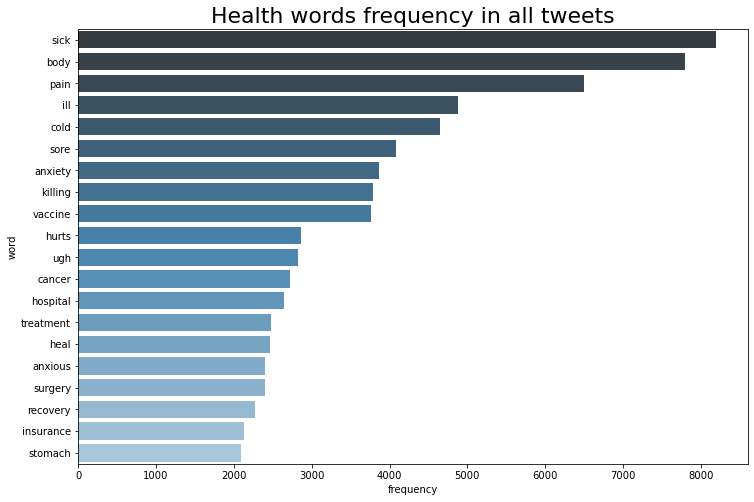

In [24]:
plt.figure(figsize=(12, 8))
sns.barplot(x='frequency', y='word', data=keywords_df[:20], palette="Blues_d")
plt.title("Health words frequency in all tweets", fontsize = 22)
plt.savefig(r'C:\Users\yuhan\Desktop\Springboard\Capstone project-3 Health_Care\figures\bar_keywords_frequency.png')

## Conclusion
From WordCloud figures above we can see that people talk about 'sick', 'body', 'pain','ill','cold','sore', 'anxiety', 'killing', and 'vaccine' a lot.

## Export data to a new csv file 

In [21]:
# save the clean data for later use
df.to_csv('data/clean_data_2.csv')